<a href="https://colab.research.google.com/github/laura-DGM/Colaboratory/blob/main/Datos_Cereal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar Libs
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Librerias o paquetes para ML/DL
import tensorflow as tf
import keras
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix


In [ ]:
#Leer Datos Cereal  punto 4
dataset_cereal = pd.read_csv("/content/dataset_cereal.csv") #dataset_iris es mi DataFrame (df)
dataset_cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
#punto 5    muestra de la parte final de la tabla
dataset_cereal.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [ ]:
#punto 5    muestra de la parte principal de la tabla
dataset_cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


punto 6
¿Qué variables hay? estan :

nombres/ fabricante / tipo / caloria /  proteina / grasa /sodio/ fibra /carbohidratos/ azucar/ potacion/ vitamina /estante/ peso /porcion tasas/ calificacion/
¿Qué tipos de datos hay en las columnas?

nombres  :nombre del cereal
fabricante:iniciales caracteristicas del las empresas que hacen el cereal
tipo:si se sirve frio o caliente
calorias :cuantas calorias posee el cereal
proteina :cantidad de proteinas en el cereal
soldio   :cantidad de sodio en miligramos en el cereal
vitaminas:que vitaminas y minerales posee el cereal
estante  :en que estante se encuentra  
peso     :peso en onza de una porcion
taza     :cantidad de taza en una porcion
calificacion: es la calificacion del cereal
 ¿cuales podrían ser features y cuál podría ser target?

 target :calificacion /estante
 featura:nombres/ fabricante / tipo / caloria /  proteina / grasa /sodio/ fibra /carbohidratos/ azucar/ potacion/ vitamina / peso /porcion tasas/

In [ ]:
#punto7

dat_cereal_shelf=dataset_cereal.drop(['calories','potass','vitamins','fat','protein', 'sodium','carbo','sugars','weight','rating'],axis=1)
dat_cereal_shelf.rename(columns={'shelf': 'Target',}, inplace=True)
dat_cereal_shelf

,name,mfr,type,fiber,Target,cups
0,100% Bran,N,C,10.0,3,0.33
1,100% Natural Bran,Q,C,2.0,3,1.00
2,All-Bran,K,C,9.0,3,0.33
3,All-Bran with Extra Fiber,K,C,14.0,3,0.50
4,Almond Delight,R,C,1.0,3,0.75
...,...,...,...,...,...,...
72,Triples,G,C,0.0,3,0.75
73,Trix,G,C,0.0,2,1.00
74,Wheat Chex,R,C,3.0,1,0.67
75,Wheaties,G,C,3.0,1,1.00


In [ ]:
dat_cereal_rating=dataset_cereal.drop(['mfr','type','fat', 'sodium','fiber', 'potass','weight','cups','shelf'],axis=1)
dat_cereal_rating.rename(columns={'rating': 'Target',}, inplace=True)
dat_cereal_rating

,name,calories,protein,carbo,sugars,vitamins,Target
0,100% Bran,70,4,5.0,6,25,68.402973
1,100% Natural Bran,120,3,8.0,8,0,33.983679
2,All-Bran,70,4,7.0,5,25,59.425505
3,All-Bran with Extra Fiber,50,4,8.0,0,25,93.704912
4,Almond Delight,110,2,14.0,8,25,34.384843
...,...,...,...,...,...,...,...
72,Triples,110,2,21.0,3,25,39.106174
73,Trix,110,1,13.0,12,25,27.753301
74,Wheat Chex,100,3,17.0,3,25,49.787445
75,Wheaties,100,3,17.0,3,25,51.592193


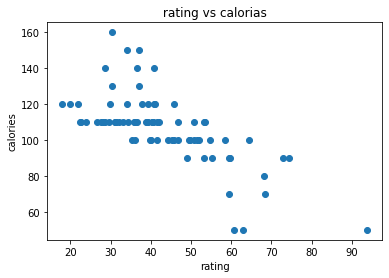

In [ ]:
#punto 8
Target=  dat_cereal_rating.loc[:,'Target']
calorias=  dat_cereal_rating.loc[:,'calories']
nombres=  dat_cereal_rating.loc[:,'name']
proteina= dat_cereal_rating.loc[:,'protein']

plt.scatter(Target,calorias)
plt.title (' rating vs calorias ')
plt.xlabel('rating')
plt.ylabel('calories')

plt.show()


In [ ]:
plt.bar(nombres,Target)
plt.title ('rating vs nombres')
plt.xlabel('ratings')
plt.ylabel('nombres')
plt.show()

In [ ]:
plt.bar(proteina,Target)
plt.title ('rating vs nombres')
plt.xlabel('ratings')
plt.ylabel('nombres')
plt.show()

In [ ]:
#punto 9
x=dat_cereal_rating.drop(['Target','name'],axis=1)
y=dat_cereal_rating.loc[:,'Target']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.35)
print('datos de entrenamiento', x_train.shape[0])
print('datos de prueba', x_test.shape[0])

datos de entrenamiento 50
datos de prueba 27


In [ ]:
#punto 10
linear_regression=LinearRegression()
o=linear_regression.fit(x_train,y_train)
#punto 11
print ("el rendimiento es:",round(o.score(x_test,y_test)*100,2),"%")

el rendimiento es: 48.33 %
